# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
df = pd.read_csv('Data.csv')
df1 = df.copy()
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR in,18-07-2019 00:00,2019,1929565768,02-07-2019,20190702,20190702,20190717,USD,RV,1,NaN,12080.07,20190702,NAH4,1929565768,0
1,U001,200762301,C&S WH co,31-10-2019 00:00,2019,1930016885,16-10-2019,20191015,20191016,20191031,USD,RV,1,NaN,123857.10,20191016,NAC6,1930016885,0
2,U001,200769623,WAL-MAR corp,01-04-2019 00:00,2019,1928993102,20-03-2019,20190319,20190320,20190404,USD,RV,1,NaN,1444.67,20190320,NAH4,1928993102,0
3,U001,200769623,WAL-MAR llc,23-04-2019 00:00,2019,1929137198,13-04-2019,20190412,20190413,20190428,USD,RV,1,NaN,11281.95,20190413,NAH4,1929137198,0
4,U001,100030964,NATURA us,NaN,2020,1930593796,06-03-2020,20200303,20200306,20200321,USD,RV,1,NaN,15369.55,20200306,NAA8,1930593796,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,100030964,NATURA us,25-04-2019 00:00,2019,1929173258,18-04-2019,20190418,20190418,20190503,USD,RV,1,NaN,3349.40,20190418,NAA8,1929173258,0
49996,U001,200794332,COST llc,NaN,2020,1930594600,03-03-2020,20200303,20200303,20200318,USD,RV,1,NaN,32715.47,20200303,NAAX,1930594600,1
49997,U013,100046468,CORPORACI associates,28-05-2019 00:00,2019,1991827244,21-05-2019,20190522,20190521,20190521,USD,RV,1,NaN,13986.00,20190521,NAUP,1991827244,0
49998,CA02,140105847,GORDON F corp,02-07-2019 00:00,2019,2960555017,15-06-2019,20190615,20190615,20190627,CAD,RV,1,NaN,757.46,20190617,CA10,2960555017,0


**Checking for Null values**

In [3]:
df1.isnull()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49996,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**As there is null values presenet in clear_date column, therefore we will separate the columns into train & test data and put the null values into the test data**

In [4]:
train_data=df1.loc[df1['clear_date'].notnull(),:]
test_data = df1.loc[df1.clear_date.isna(),:]

In [5]:
train_data.shape,test_data.shape

((40000, 19), (10000, 19))

In [6]:
pred_column = test_data

# Data Pre-Processing

**Removing Constant Columns**

In [7]:
unique_cols =  [x for x in train_data.columns if train_data[x].nunique()==1] 
print(unique_cols)
train_data.drop(unique_cols,axis=1,inplace=True)
train_data.columns
train_data.shape

['document type', 'posting_id', 'isOpen']


(40000, 16)

In [8]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,200769623,WAL-MAR in,18-07-2019 00:00,2019,1929565768,02-07-2019,20190702,20190702,20190717,USD,NaN,12080.07,20190702,NAH4,1929565768
1,U001,200762301,C&S WH co,31-10-2019 00:00,2019,1930016885,16-10-2019,20191015,20191016,20191031,USD,NaN,123857.10,20191016,NAC6,1930016885
2,U001,200769623,WAL-MAR corp,01-04-2019 00:00,2019,1928993102,20-03-2019,20190319,20190320,20190404,USD,NaN,1444.67,20190320,NAH4,1928993102
3,U001,200769623,WAL-MAR llc,23-04-2019 00:00,2019,1929137198,13-04-2019,20190412,20190413,20190428,USD,NaN,11281.95,20190413,NAH4,1929137198
5,U001,200799367,MCL systems,05-07-2019 00:00,2019,1929515666,19-06-2019,20190619,20190619,20190704,USD,NaN,10483.53,20190619,NAA8,1929515666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200759082,INGL trust,30-08-2019 00:00,2019,1929748152,14-08-2019,20190814,20190814,20190829,USD,NaN,33386.55,20190814,NAA8,1929748152
49995,U001,100030964,NATURA us,25-04-2019 00:00,2019,1929173258,18-04-2019,20190418,20190418,20190503,USD,NaN,3349.40,20190418,NAA8,1929173258
49997,U013,100046468,CORPORACI associates,28-05-2019 00:00,2019,1991827244,21-05-2019,20190522,20190521,20190521,USD,NaN,13986.00,20190521,NAUP,1991827244
49998,CA02,140105847,GORDON F corp,02-07-2019 00:00,2019,2960555017,15-06-2019,20190615,20190615,20190627,CAD,NaN,757.46,20190617,CA10,2960555017


In [9]:
train_data.nunique()

business_code                 6
cust_number                1026
name_customer              3857
clear_date                  387
buisness_year                 2
doc_id                    39141
posting_date                423
document_create_date        426
document_create_date.1      423
due_in_date                 491
invoice_currency              2
area_business                 0
total_open_amount         35678
baseline_create_date        434
cust_payment_terms           67
invoice_id                39141
dtype: int64

**Dropping Unnecessary Columns**

**document_create_date and document_create_date.1 are almost identical so we can use any one of those**

**dropping identifier columns and area_business column as it has no values in it**

In [10]:
train_data.drop(['invoice_id','document_create_date.1','area_business','doc_id'],axis=1,inplace=True)

In [11]:
train_data.shape

(40000, 12)

In [12]:
train_data.business_code.value_counts()

U001    36189
CA02     3148
U013      513
U002      140
U005        8
U007        2
Name: business_code, dtype: int64

**As business_code column has multiple values but U002 U005 U007 values are less compare to others. So we will group them together**

In [13]:
train_data['business_code'] = np.where(train_data['business_code'].isin(['U002','U005','U007']),
                                       'Others',train_data['business_code'])

In [14]:
train_data.business_code.value_counts()

U001      36189
CA02       3148
U013        513
Others      150
Name: business_code, dtype: int64

**Sorting the data in Ascending Order based on the posting_date column**

In [15]:
train_data=train_data.sort_values(by=['posting_date'])
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
24787,U001,200769623,WAL-MAR us,11-01-2019 00:00,2019,01-01-2019,20181230,20190116,USD,50426.74,20190101,NAH4
34142,U001,CCU013,KRAFT F us,01-03-2019 00:00,2019,01-01-2019,20181231,20190101,USD,2738.41,20190101,NAX2
48795,U001,200707822,PUBLI corporation,16-01-2019 00:00,2019,01-01-2019,20190102,20190116,USD,120737.98,20190101,NAA8
16965,U001,200772595,SAFEW foundation,16-01-2019 00:00,2019,01-01-2019,20181230,20190116,USD,61289.77,20190101,NAA8
713,U001,200744019,TARG associates,22-01-2019 00:00,2019,01-01-2019,20181231,20190116,USD,48685.27,20190101,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...
12748,U001,200762301,C&S WH in,15-01-2020 00:00,2020,31-12-2019,20191230,20200115,USD,21597.65,20191231,NAC6
30817,U001,200508557,FOODL systems,15-01-2020 00:00,2020,31-12-2019,20191230,20200115,USD,3317.01,20191231,NAA8
36279,U001,200743129,BROOKS llc,15-01-2020 00:00,2020,31-12-2019,20200101,20200115,USD,146802.84,20191231,NAA8
17846,U001,200769623,WAL-MAR in,13-01-2020 00:00,2020,31-12-2019,20191231,20200115,USD,471.56,20191231,NAH4


 **Removing the Time part from clear_date column**

In [16]:
train_data['clear_date']=pd.to_datetime(train_data['clear_date'])

In [17]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
24787,U001,200769623,WAL-MAR us,2019-11-01,2019,01-01-2019,20181230,20190116,USD,50426.74,20190101,NAH4
34142,U001,CCU013,KRAFT F us,2019-01-03,2019,01-01-2019,20181231,20190101,USD,2738.41,20190101,NAX2
48795,U001,200707822,PUBLI corporation,2019-01-16,2019,01-01-2019,20190102,20190116,USD,120737.98,20190101,NAA8
16965,U001,200772595,SAFEW foundation,2019-01-16,2019,01-01-2019,20181230,20190116,USD,61289.77,20190101,NAA8
713,U001,200744019,TARG associates,2019-01-22,2019,01-01-2019,20181231,20190116,USD,48685.27,20190101,NAA8


 **log transformation of total_open_amount column**

In [18]:
train_data['total_open_amount'] = np.log(train_data['total_open_amount'])
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
24787,U001,200769623,WAL-MAR us,2019-11-01,2019,01-01-2019,20181230,20190116,USD,10.828277,20190101,NAH4
34142,U001,CCU013,KRAFT F us,2019-01-03,2019,01-01-2019,20181231,20190101,USD,7.915133,20190101,NAX2
48795,U001,200707822,PUBLI corporation,2019-01-16,2019,01-01-2019,20190102,20190116,USD,11.701378,20190101,NAA8
16965,U001,200772595,SAFEW foundation,2019-01-16,2019,01-01-2019,20181230,20190116,USD,11.023368,20190101,NAA8
713,U001,200744019,TARG associates,2019-01-22,2019,01-01-2019,20181231,20190116,USD,10.793132,20190101,NAA8


**Making target column which is 'Delay' column**

In [19]:
#converting the datatype of due_in_date column same as clear_date column
train_data.due_in_date=pd.to_datetime(train_data.due_in_date, format='%Y%m%d', errors='coerce')

In [20]:
train_data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
posting_date                    object
document_create_date             int64
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date             int64
cust_payment_terms              object
dtype: object

In [21]:
import datetime as dt
train_data['delay']=train_data['clear_date'].subtract(train_data['due_in_date']).dt.days

In [22]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
24787,U001,200769623,WAL-MAR us,2019-11-01,2019,01-01-2019,20181230,2019-01-16,USD,10.828277,20190101,NAH4,289
34142,U001,CCU013,KRAFT F us,2019-01-03,2019,01-01-2019,20181231,2019-01-01,USD,7.915133,20190101,NAX2,2
48795,U001,200707822,PUBLI corporation,2019-01-16,2019,01-01-2019,20190102,2019-01-16,USD,11.701378,20190101,NAA8,0
16965,U001,200772595,SAFEW foundation,2019-01-16,2019,01-01-2019,20181230,2019-01-16,USD,11.023368,20190101,NAA8,0
713,U001,200744019,TARG associates,2019-01-22,2019,01-01-2019,20181231,2019-01-16,USD,10.793132,20190101,NAA8,6


**Encoding Categorical columns**

In [23]:
#encoding the business_code column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data['business_code'])
train_data['business_code_enc'] = le.transform(train_data['business_code'])

In [24]:
#encoding the cust_payment_terms column
le.fit(train_data['cust_payment_terms'])
train_data['cust_payment_terms_enc'] = le.transform(train_data['cust_payment_terms'])

In [25]:
#encoding the invoice_currency column
le.fit(train_data['invoice_currency'])
train_data['invoice_currency_enc'] = le.transform(train_data['invoice_currency'])

In [26]:
#encoding cust_number column
le.fit(train_data['cust_number'])
train_data['cust_number_enc'] = le.transform(train_data['cust_number'])

In [27]:
#dropping the coulmns
train_data.drop(['business_code','cust_payment_terms','invoice_currency','cust_number'], axis =1,inplace=True)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 24787 to 15346
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           40000 non-null  object        
 1   clear_date              40000 non-null  datetime64[ns]
 2   buisness_year           40000 non-null  int64         
 3   posting_date            40000 non-null  object        
 4   document_create_date    40000 non-null  int64         
 5   due_in_date             40000 non-null  datetime64[ns]
 6   total_open_amount       40000 non-null  float64       
 7   baseline_create_date    40000 non-null  int64         
 8   delay                   40000 non-null  int64         
 9   business_code_enc       40000 non-null  int32         
 10  cust_payment_terms_enc  40000 non-null  int32         
 11  invoice_currency_enc    40000 non-null  int32         
 12  cust_number_enc         40000 non-null  in

In [29]:
#as name_customer coolumn has many unique values and we are unable to encode them so we should drop it
train_data.drop(['name_customer'], axis=1,inplace=True)

In [30]:
train_data.head()

,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,delay,business_code_enc,cust_payment_terms_enc,invoice_currency_enc,cust_number_enc
24787,2019-11-01,2019,01-01-2019,20181230,2019-01-16,10.828277,20190101,289,2,34,1,847
34142,2019-01-03,2019,01-01-2019,20181231,2019-01-01,7.915133,20190101,2,2,66,1,1025
48795,2019-01-16,2019,01-01-2019,20190102,2019-01-16,11.701378,20190101,0,2,20,1,714
16965,2019-01-16,2019,01-01-2019,20181230,2019-01-16,11.023368,20190101,0,2,20,1,851
713,2019-01-22,2019,01-01-2019,20181231,2019-01-16,10.793132,20190101,6,2,20,1,794


# Splitting the Data

**We want to split the train_data into Train, validation & Test data** 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = train_data.drop(['delay'],axis=1)
y = train_data['delay']

In [33]:
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [34]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)

In [35]:
X_train.shape,X_val.shape,X_test.shape

((28000, 11), (6000, 11), (6000, 11))

# EDA 

**We will be doing all the tests in X_train data itself**

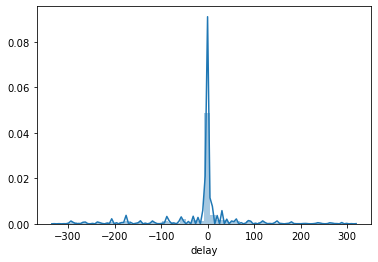

In [36]:
#plotting distribution graph on y_train
sns.distplot(y_train)

In [37]:
#temporarily merging the Target column for scatter plot
X_train.merge(y_train,on = X_train.index)

,key_0,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,business_code_enc,cust_payment_terms_enc,invoice_currency_enc,cust_number_enc,delay
0,24787,2019-11-01,2019,01-01-2019,20181230,2019-01-16,10.828277,20190101,2,34,1,847,289
1,34142,2019-01-03,2019,01-01-2019,20181231,2019-01-01,7.915133,20190101,2,66,1,1025,2
2,48795,2019-01-16,2019,01-01-2019,20190102,2019-01-16,11.701378,20190101,2,20,1,714,0
3,16965,2019-01-16,2019,01-01-2019,20181230,2019-01-16,11.023368,20190101,2,20,1,851,0
4,713,2019-01-22,2019,01-01-2019,20181231,2019-01-16,10.793132,20190101,2,20,1,794,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,33680,2019-08-03,2019,22-02-2019,20190221,2019-03-09,9.722081,20190222,2,20,1,498,147
27996,1286,2019-03-29,2019,22-02-2019,20190218,2019-03-29,9.148499,20190222,2,32,1,1024,0
27997,8084,2019-11-03,2019,22-02-2019,20190220,2019-03-09,10.133936,20190222,2,34,1,847,239
27998,30848,2019-11-03,2019,22-02-2019,20190220,2019-03-09,10.876465,20190222,2,22,1,918,239


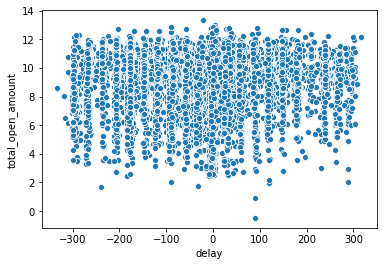

In [38]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

In [39]:
X_train

,clear_date,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,business_code_enc,cust_payment_terms_enc,invoice_currency_enc,cust_number_enc
24787,2019-11-01,2019,01-01-2019,20181230,2019-01-16,10.828277,20190101,2,34,1,847
34142,2019-01-03,2019,01-01-2019,20181231,2019-01-01,7.915133,20190101,2,66,1,1025
48795,2019-01-16,2019,01-01-2019,20190102,2019-01-16,11.701378,20190101,2,20,1,714
16965,2019-01-16,2019,01-01-2019,20181230,2019-01-16,11.023368,20190101,2,20,1,851
713,2019-01-22,2019,01-01-2019,20181231,2019-01-16,10.793132,20190101,2,20,1,794
...,...,...,...,...,...,...,...,...,...,...,...
33680,2019-08-03,2019,22-02-2019,20190221,2019-03-09,9.722081,20190222,2,20,1,498
1286,2019-03-29,2019,22-02-2019,20190218,2019-03-29,9.148499,20190222,2,32,1,1024
8084,2019-11-03,2019,22-02-2019,20190220,2019-03-09,10.133936,20190222,2,34,1,847
30848,2019-11-03,2019,22-02-2019,20190220,2019-03-09,10.876465,20190222,2,22,1,918


# Feature Engg.

In [40]:
#splitting posting_date on the basis of '-' and convering it into integer format
X_train['posting_date'] = X_train['posting_date'].str.replace('-',"").astype(int)
X_val['posting_date'] = X_val['posting_date'].str.replace('-',"").astype(int)
X_test['posting_date'] = X_test['posting_date'].str.replace('-',"").astype(int)

In [41]:
#converting total_open_amount column to integer format
X_train['total_open_amount'] = X_train['total_open_amount'].astype(int)
X_val['total_open_amount'] = X_val['total_open_amount'].astype(int)
X_test['total_open_amount'] = X_test['total_open_amount'].astype(int)

In [42]:
#separating day,month,year from clear_date column
X_train['day_of_clearence'] = X_train['clear_date'].dt.day
X_train['month_of_clearence'] = X_train['clear_date'].dt.month
X_train['year_of_clearence'] = X_train['clear_date'].dt.year

X_val['day_of_clearence'] = X_val['clear_date'].dt.day
X_val['month_of_clearence'] = X_val['clear_date'].dt.month
X_val['year_of_clearence'] = X_val['clear_date'].dt.year

X_test['day_of_clearence'] = X_test['clear_date'].dt.day
X_test['month_of_clearence'] = X_test['clear_date'].dt.month
X_test['year_of_clearence'] = X_test['clear_date'].dt.year

In [43]:
#separating day,month,year from due_in_date column
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [44]:
#after separating day,month,year we can now drop these two columns
X_train.drop(['clear_date','due_in_date'],axis=1,inplace=True)
X_val.drop(['clear_date','due_in_date'],axis=1,inplace=True)
X_test.drop(['clear_date','due_in_date'],axis=1,inplace=True)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 24787 to 36615
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   buisness_year           28000 non-null  int64
 1   posting_date            28000 non-null  int32
 2   document_create_date    28000 non-null  int64
 3   total_open_amount       28000 non-null  int32
 4   baseline_create_date    28000 non-null  int64
 5   business_code_enc       28000 non-null  int32
 6   cust_payment_terms_enc  28000 non-null  int32
 7   invoice_currency_enc    28000 non-null  int32
 8   cust_number_enc         28000 non-null  int32
 9   day_of_clearence        28000 non-null  int64
 10  month_of_clearence      28000 non-null  int64
 11  year_of_clearence       28000 non-null  int64
 12  day_of_due              28000 non-null  int64
 13  month_of_due            28000 non-null  int64
 14  year_of_due             28000 non-null  int64
dtypes: int32(6), in

# Feature Selection

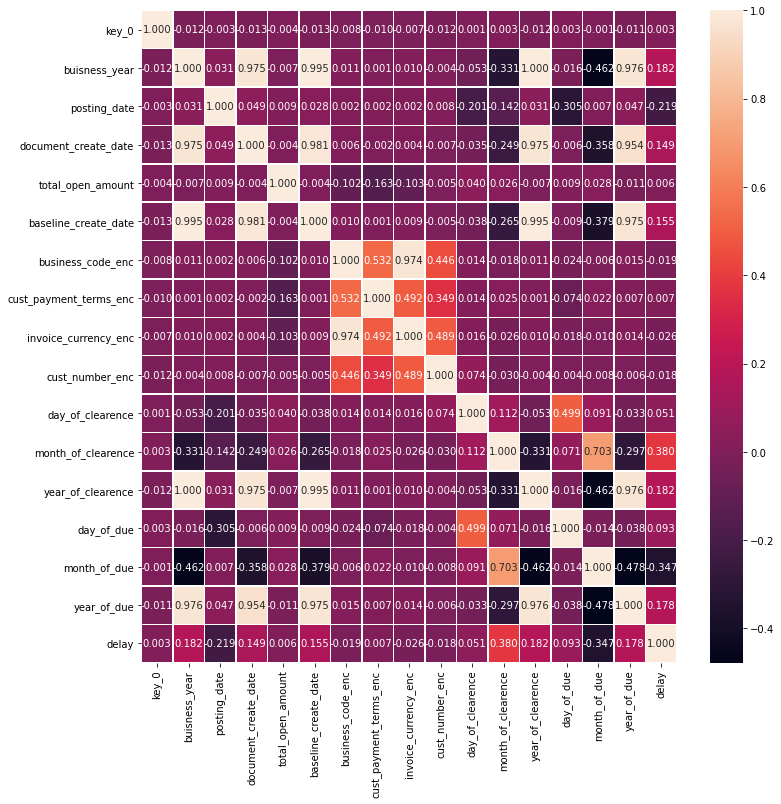

In [46]:
#plotting heatmap for training data
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(X_train.merge(y_train , on = X_train.index).corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

In [47]:
#removing the features which have almost no covaraince for better modelling
X_train.drop('posting_date',axis=1,inplace=True)
X_val.drop('posting_date',axis=1,inplace=True)
X_test.drop('posting_date',axis=1,inplace=True)

X_train.drop('invoice_currency_enc',axis=1,inplace=True)
X_val.drop('invoice_currency_enc',axis=1,inplace=True)
X_test.drop('invoice_currency_enc',axis=1,inplace=True)

X_train.drop('business_code_enc',axis=1,inplace=True)
X_val.drop('business_code_enc',axis=1,inplace=True)
X_test.drop('business_code_enc',axis=1,inplace=True)

X_train.drop('cust_number_enc',axis=1,inplace=True)
X_val.drop('cust_number_enc',axis=1,inplace=True)
X_test.drop('cust_number_enc',axis=1,inplace=True)

# Modelling

In [48]:
#LinearRegression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = base_model.predict(X_val)

In [50]:
from sklearn.metrics import mean_squared_error
print("RMSE value for LinearRegression model is: ")
mean_squared_error(y_val, y_pred, squared=False)

RMSE value for LinearRegression model is: 


0.8672924099984239

# Tree Based Model

In [51]:
#Decision Tree Regression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=11)

In [52]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

In [53]:
y_pred = regressor.predict(X_val)

In [54]:
print("RMSE value for Decision Tree Regression model is: ")
mean_squared_error(y_val, y_pred, squared=False)

RMSE value for Decision Tree Regression model is: 


8.776978656860127

In [55]:
print("MSE value for Decision Tree Regression model is: ")
mean_squared_error(y_val, y_pred, squared=True)

MSE value for Decision Tree Regression model is: 


77.0353543429782

**Doing a prediction on the X_test set just to confirm that the model is not overfitting**

In [56]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test,squared = False)

8.795655088636487

# The lost data

In [57]:
#we can see the clear_date column has all null values
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,U001,100030964,NATURA us,NaN,2020,1930593796,06-03-2020,20200303,20200306,20200321,USD,RV,1,NaN,15369.55,20200306,NAA8,1930593796,1
6,U001,200769623,WAL-MAR llc,NaN,2020,1930781662,15-04-2020,20200413,20200415,20200430,USD,RV,1,NaN,26898.52,20200415,NAH4,1930781662,1
9,U001,200769623,WAL-MAR,NaN,2020,1930780365,14-04-2020,20200413,20200414,20200429,USD,RV,1,NaN,37218.00,20200414,NAH4,1930780365,1
26,U001,200020431,DEC us,NaN,2020,1930817571,23-04-2020,20200423,20200423,20200509,USD,RV,1,NaN,7264.70,20200416,NAM4,1930817571,1
28,U001,200769623,WAL-MAR systems,NaN,2020,1930715042,28-03-2020,20200328,20200328,20200412,USD,RV,1,NaN,661.11,20200328,NAH4,1930715042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,200772670,ASSOCIAT foundation,NaN,2020,1930653634,14-03-2020,20200315,20200314,20200329,USD,RV,1,NaN,46258.27,20200314,NAU5,1930653634,1
49985,U001,200779051,AFFILI corp,NaN,2020,1930708439,26-03-2020,20200326,20200326,20200410,USD,RV,1,NaN,41484.95,20200326,NAA8,1930708439,1
49989,CA02,140104249,SOB,NaN,2020,2960628663,18-04-2020,20200418,20200418,20200506,CAD,RV,1,NaN,95669.64,20200426,CA10,2960628663,1
49991,CA02,140105686,SYSC in,NaN,2020,2960623659,27-03-2020,20200327,20200327,20200415,CAD,RV,1,NaN,1404.34,20200405,CA10,2960623659,1


In [58]:
lost_data = test_data

In [59]:
lost_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,U001,100030964,NATURA us,NaN,2020,1930593796,06-03-2020,20200303,20200306,20200321,USD,RV,1,NaN,15369.55,20200306,NAA8,1930593796,1
6,U001,200769623,WAL-MAR llc,NaN,2020,1930781662,15-04-2020,20200413,20200415,20200430,USD,RV,1,NaN,26898.52,20200415,NAH4,1930781662,1
9,U001,200769623,WAL-MAR,NaN,2020,1930780365,14-04-2020,20200413,20200414,20200429,USD,RV,1,NaN,37218.00,20200414,NAH4,1930780365,1
26,U001,200020431,DEC us,NaN,2020,1930817571,23-04-2020,20200423,20200423,20200509,USD,RV,1,NaN,7264.70,20200416,NAM4,1930817571,1
28,U001,200769623,WAL-MAR systems,NaN,2020,1930715042,28-03-2020,20200328,20200328,20200412,USD,RV,1,NaN,661.11,20200328,NAH4,1930715042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,200772670,ASSOCIAT foundation,NaN,2020,1930653634,14-03-2020,20200315,20200314,20200329,USD,RV,1,NaN,46258.27,20200314,NAU5,1930653634,1
49985,U001,200779051,AFFILI corp,NaN,2020,1930708439,26-03-2020,20200326,20200326,20200410,USD,RV,1,NaN,41484.95,20200326,NAA8,1930708439,1
49989,CA02,140104249,SOB,NaN,2020,2960628663,18-04-2020,20200418,20200418,20200506,CAD,RV,1,NaN,95669.64,20200426,CA10,2960628663,1
49991,CA02,140105686,SYSC in,NaN,2020,2960623659,27-03-2020,20200327,20200327,20200415,CAD,RV,1,NaN,1404.34,20200405,CA10,2960623659,1


**We have to bring the test_data in same format as that of the X_train**

**Preprocessing**

In [60]:
#checking null values
test_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

**Dropping clear_date column as we are going to predict the Delay and its null. Also we are dropping area_business column as it has all null values**

In [61]:
test_data.drop(['clear_date','area_business'],axis=1,inplace=True)

In [62]:
#Assigning the tes_data in X_test_data
X_test_data = test_data

In [63]:
X_test_data

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,U001,100030964,NATURA us,2020,1930593796,06-03-2020,20200303,20200306,20200321,USD,RV,1,15369.55,20200306,NAA8,1930593796,1
6,U001,200769623,WAL-MAR llc,2020,1930781662,15-04-2020,20200413,20200415,20200430,USD,RV,1,26898.52,20200415,NAH4,1930781662,1
9,U001,200769623,WAL-MAR,2020,1930780365,14-04-2020,20200413,20200414,20200429,USD,RV,1,37218.00,20200414,NAH4,1930780365,1
26,U001,200020431,DEC us,2020,1930817571,23-04-2020,20200423,20200423,20200509,USD,RV,1,7264.70,20200416,NAM4,1930817571,1
28,U001,200769623,WAL-MAR systems,2020,1930715042,28-03-2020,20200328,20200328,20200412,USD,RV,1,661.11,20200328,NAH4,1930715042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,U001,200772670,ASSOCIAT foundation,2020,1930653634,14-03-2020,20200315,20200314,20200329,USD,RV,1,46258.27,20200314,NAU5,1930653634,1
49985,U001,200779051,AFFILI corp,2020,1930708439,26-03-2020,20200326,20200326,20200410,USD,RV,1,41484.95,20200326,NAA8,1930708439,1
49989,CA02,140104249,SOB,2020,2960628663,18-04-2020,20200418,20200418,20200506,CAD,RV,1,95669.64,20200426,CA10,2960628663,1
49991,CA02,140105686,SYSC in,2020,2960623659,27-03-2020,20200327,20200327,20200415,CAD,RV,1,1404.34,20200405,CA10,2960623659,1


**Removing Constant/Dupplicate columns**

In [64]:
unique_cols =  [x for x in X_test_data.columns if X_test_data[x].nunique()==1] 
print(unique_cols)
X_test_data.drop(unique_cols,axis=1,inplace=True)
X_test_data.columns
X_test_data.shape

['buisness_year', 'document type', 'posting_id', 'isOpen']


(10000, 13)

In [65]:
X_test_data.nunique()

business_code                5
cust_number                535
name_customer             1788
doc_id                    9703
posting_date                80
document_create_date        87
document_create_date.1      80
due_in_date                128
invoice_currency             2
total_open_amount         9031
baseline_create_date        82
cust_payment_terms          43
invoice_id                9703
dtype: int64

**Dropping Unnecessary Columns**

**document_create_date and document_create_date.1 are almost identical so we can use any one of those**

**Dropping identifier columns**

In [66]:
X_test_data.drop(['invoice_id','document_create_date.1','doc_id'],axis=1,inplace=True)

In [67]:
X_test_data.shape

(10000, 10)

In [68]:
X_test_data.business_code.value_counts()

U001    9162
CA02     734
U013      67
U002      34
U005       3
Name: business_code, dtype: int64

**As business_code column has multiple values but U002 U005 values are less compare to others. So we will group them together**

In [69]:
X_test_data['business_code'] = np.where(X_test_data['business_code'].isin(['U002','U005']),
                                       'Others',X_test_data['business_code'])

In [70]:
X_test_data.business_code.value_counts()

U001      9162
CA02       734
U013        67
Others      37
Name: business_code, dtype: int64

**Sorting the data in Ascending Order based on the posting_date column**

In [71]:
X_test_data=X_test_data.sort_values(by=['posting_date'])
X_test_data

,business_code,cust_number,name_customer,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
30538,U001,200726979,BJ'S co,01-03-2020,20200229,20200316,USD,95.02,20200301,NAA8
47308,U001,200148860,DOLLA foundation,01-03-2020,20200229,20200316,USD,73109.22,20200301,NAA8
6968,U001,200790107,ROU foundation,01-03-2020,20200301,20200316,USD,71604.74,20200301,NAC6
40596,U001,200707822,PUBLI corp,01-03-2020,20200301,20200316,USD,107176.77,20200301,NAA8
13737,U001,200729290,KROGER associates,01-03-2020,20200229,20200316,USD,10942.14,20200301,NAA8
...,...,...,...,...,...,...,...,...,...,...
38642,U001,200706844,WINC systems,31-03-2020,20200330,20200415,USD,21042.96,20200331,NAA8
20718,CA02,140104423,METRO in,31-03-2020,20200331,20200412,CAD,149018.60,20200402,CA10
41736,U001,200769623,WAL-MAR corporation,31-03-2020,20200331,20200415,USD,66532.79,20200331,NAH4
48856,CA02,140104285,BUY- corp,31-03-2020,20200331,20200419,CAD,14985.19,20200409,CA10


**log transformation of total_open_amount column**

In [72]:
X_test_data['total_open_amount'] = np.log(X_test_data['total_open_amount'])
X_test_data.head()

,business_code,cust_number,name_customer,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
30538,U001,200726979,BJ'S co,01-03-2020,20200229,20200316,USD,4.554087,20200301,NAA8
47308,U001,200148860,DOLLA foundation,01-03-2020,20200229,20200316,USD,11.199710,20200301,NAA8
6968,U001,200790107,ROU foundation,01-03-2020,20200301,20200316,USD,11.178917,20200301,NAC6
40596,U001,200707822,PUBLI corp,01-03-2020,20200301,20200316,USD,11.582235,20200301,NAA8
13737,U001,200729290,KROGER associates,01-03-2020,20200229,20200316,USD,9.300377,20200301,NAA8


**Encoding Categorical columns**

In [73]:
#encoding the business_code column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_test_data['business_code'])
X_test_data['business_code_enc'] = le.transform(X_test_data['business_code'])

In [74]:
#encoding the cust_payment_terms column
le.fit(X_test_data['cust_payment_terms'])
X_test_data['cust_payment_terms_enc'] = le.transform(X_test_data['cust_payment_terms'])

In [75]:
#encoding the invoice_currency column
le.fit(X_test_data['invoice_currency'])
X_test_data['invoice_currency_enc'] = le.transform(X_test_data['invoice_currency'])

In [76]:
#encoding cust_number column
le.fit(X_test_data['cust_number'])
X_test_data['cust_number_enc'] = le.transform(X_test_data['cust_number'])

In [77]:
#dropping the coulmns
X_test_data.drop(['business_code','cust_payment_terms','invoice_currency','cust_number'], axis =1,inplace=True)

In [78]:
#as name_customer column has many unique values and we are unable to encode them so we should drop it
X_test_data.drop(['name_customer'], axis=1,inplace=True)

In [79]:
#converting the datatype of due_in_date column to datetime
X_test_data.due_in_date=pd.to_datetime(X_test_data.due_in_date, format='%Y%m%d', errors='coerce')

In [80]:
#separating day,month,year from due_in_date column
X_test_data['day_of_due'] = X_test_data['due_in_date'].dt.day
X_test_data['month_of_due'] = X_test_data['due_in_date'].dt.month
X_test_data['year_of_due'] = X_test_data['due_in_date'].dt.year

In [81]:
X_test_data

,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,business_code_enc,cust_payment_terms_enc,invoice_currency_enc,cust_number_enc,day_of_due,month_of_due,year_of_due
30538,01-03-2020,20200229,2020-03-16,4.554087,20200301,2,13,1,350,16,3,2020
47308,01-03-2020,20200229,2020-03-16,11.199710,20200301,2,13,1,207,16,3,2020
6968,01-03-2020,20200301,2020-03-16,11.178917,20200301,2,18,1,464,16,3,2020
40596,01-03-2020,20200301,2020-03-16,11.582235,20200301,2,13,1,322,16,3,2020
13737,01-03-2020,20200229,2020-03-16,9.300377,20200301,2,13,1,354,16,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
38642,31-03-2020,20200330,2020-04-15,9.954321,20200331,2,13,1,318,15,4,2020
20718,31-03-2020,20200331,2020-04-12,11.911826,20200402,0,2,0,147,12,4,2020
41736,31-03-2020,20200331,2020-04-15,11.105450,20200331,2,28,1,422,15,4,2020
48856,31-03-2020,20200331,2020-04-19,9.614818,20200409,0,2,0,142,19,4,2020


In [82]:
#converting total_open_amount column to integer format
X_test_data['total_open_amount'] = X_test_data['total_open_amount'].astype(int)

In [83]:
# splitting posting_date on the basis of '-' and converting it into integer format
X_test_data['posting_date'] = X_test_data['posting_date'].str.replace('-',"").astype(int)

In [84]:
#dropping the due_in_date column
X_test_data.drop(['due_in_date'], axis=1,inplace=True)

In [85]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 30538 to 24626
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   posting_date            10000 non-null  int32
 1   document_create_date    10000 non-null  int64
 2   total_open_amount       10000 non-null  int32
 3   baseline_create_date    10000 non-null  int64
 4   business_code_enc       10000 non-null  int32
 5   cust_payment_terms_enc  10000 non-null  int32
 6   invoice_currency_enc    10000 non-null  int32
 7   cust_number_enc         10000 non-null  int32
 8   day_of_due              10000 non-null  int64
 9   month_of_due            10000 non-null  int64
 10  year_of_due             10000 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 703.1 KB


**Test data is now ready for Prediction**

# Final Prediction

In [86]:
final_result = regressor.predict(X_test_data)

In [87]:
#creating a new column which will have the Predicted Delay 
final_result = pd.Series(final_result,name='Predicted_Delay')

In [88]:
final_result

0        11.0
1        11.0
2        11.0
3        11.0
4        11.0
        ...  
9995     11.0
9996   -107.0
9997     99.0
9998   -107.0
9999     11.0
Name: Predicted_Delay, Length: 10000, dtype: float64

In [89]:
#Resetting the index of test_data
test_data.reset_index(drop=True,inplace=True)

In [90]:
# merging them together in the Final dataset
Final = test_data.merge(final_result , on = test_data.index )

In [91]:
#converting due_in_date column to datetime like value
Final['due_in_date']=pd.to_datetime(Final['due_in_date'],format='%Y%m%d',errors='coerce')

In [92]:
#converting Predicted Delay column to integer
Final['Predicted_Delay'] = Final['Predicted_Delay'].astype(int)

In [93]:
#adding due_in_date & Predicted Delay column to get the Predicted Clearance date or Predicted Payment date
Final['Predicted_Payment_date'] = Final['due_in_date'] + pd.to_timedelta(Final['Predicted_Delay'], unit='D')

In [94]:
Final['Predicted_Payment_date']

0      2020-04-01
1      2020-05-11
2      2020-05-10
3      2020-05-20
4      2020-04-23
          ...    
9995   2020-04-09
9996   2019-12-25
9997   2020-08-13
9998   2019-12-30
9999   2020-03-29
Name: Predicted_Payment_date, Length: 10000, dtype: datetime64[ns]

In [95]:
Final

,key_0,business_code,cust_number,name_customer,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Predicted_Delay,Predicted_Payment_date
0,0,U001,100030964,NATURA us,06-03-2020,20200303,2020-03-21,USD,15369.55,20200306,NAA8,11,2020-04-01
1,1,U001,200769623,WAL-MAR llc,15-04-2020,20200413,2020-04-30,USD,26898.52,20200415,NAH4,11,2020-05-11
2,2,U001,200769623,WAL-MAR,14-04-2020,20200413,2020-04-29,USD,37218.00,20200414,NAH4,11,2020-05-10
3,3,U001,200020431,DEC us,23-04-2020,20200423,2020-05-09,USD,7264.70,20200416,NAM4,11,2020-05-20
4,4,U001,200769623,WAL-MAR systems,28-03-2020,20200328,2020-04-12,USD,661.11,20200328,NAH4,11,2020-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,200772670,ASSOCIAT foundation,14-03-2020,20200315,2020-03-29,USD,46258.27,20200314,NAU5,11,2020-04-09
9996,9996,U001,200779051,AFFILI corp,26-03-2020,20200326,2020-04-10,USD,41484.95,20200326,NAA8,-107,2019-12-25
9997,9997,CA02,140104249,SOB,18-04-2020,20200418,2020-05-06,CAD,95669.64,20200426,CA10,99,2020-08-13
9998,9998,CA02,140105686,SYSC in,27-03-2020,20200327,2020-04-15,CAD,1404.34,20200405,CA10,-107,2019-12-30


# ------------------------------------------------- X ----------------------------------------------------------